<a href="https://colab.research.google.com/github/SamDavies114/pyTorchDeepLearnIntro/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

In [3]:
import torch.nn as nn

In [4]:
import torch.nn.functional as F

In [5]:
#create a model class that inherits nn.Module
class Model(nn.Module):
  #Input layer(four flower features, petal length, width etc) ->hidden layer1->hidden layer2-> output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8,h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear (h2, out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))#relu changes all less thwan zero to zero and doesnt change anyrhing else
    x= F.relu(self.fc2(x))
    x= F.relu(self.out(x))

    return x


In [6]:
#creat instance
torch.manual_seed(41)
model = Model()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [23]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

In [24]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [39]:
# Train test and split things
X= my_df.drop('variety', axis=1)
y = my_df['variety']
X = X.values
y=y.values

In [26]:
X =pd.DataFrame(my_df.drop("variety", axis=1)).to_numpy()
y =pd.DataFrame(my_df["variety"]).to_numpy()

In [42]:
from sklearn.model_selection import train_test_split #this splits the sample data into a set used for training and a set used to test the network

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [44]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_test


tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [45]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [52]:
epochs = 100
losses = []
for i in range(epochs):
  #get prediction
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)

  #keep track of loss
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epochs: {i} loss: {loss}')

  #Back propogation
  #take error, feedback, change weights to reduce error
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epochs: 0 loss: 0.0242571122944355
Epochs: 10 loss: 0.033814966678619385
Epochs: 20 loss: 0.024667557328939438
Epochs: 30 loss: 0.02259763702750206
Epochs: 40 loss: 0.02207840420305729
Epochs: 50 loss: 0.021343344822525978
Epochs: 60 loss: 0.020631756633520126
Epochs: 70 loss: 0.019990643486380577
Epochs: 80 loss: 0.019381901249289513
Epochs: 90 loss: 0.018780270591378212


Text(0.5, 0, 'epochs')

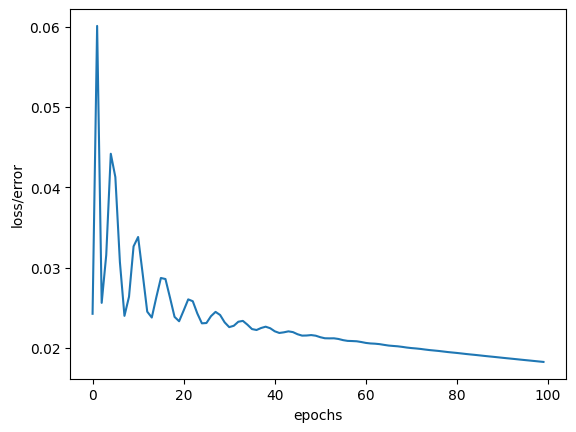

In [56]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")
